# PARTIE I: EXPLORATION Ford GoBike 

## PAR: Ngan Desire


## Introduction

For Gobike est un service de velo-partage lancé par l'entreprise Ford dans la ville de San francisco.Un service de 

vélo partage met a la disposition du publique des velo gratuitement ou non.cette consommation permet de lever trois 

freins a la pratique du vélo:le stationnement à domicile,le vol et la maintenance de son vélo personnel.For Gobike 

permet de  retirer un velo d'une station et la déposer dans une autre.L'ensemble des données de For Gobike donne des 

informations tels que la station de départ(start_station_id), la station d'arrivée(end_station_id),la durée du 

trajet(duration_sec),ainsi que les informations concernant le membre(member_birth_year,member_gender) 


## Analyse préliminaire

In [1]:
#Importation des différents packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
#Lecture du fichier csv Ford GoBike
df=pd.read_csv('201902-fordgobike-tripdata.csv',sep=',')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
#Taille de notre dataframe
df.shape

(183412, 16)

In [4]:
#Analysons un echantillon des données
#Fonction permettant de renvoyer un echantillon de notre dataset
def get_sample(df):
    return df.sample(20)

In [5]:
get_sample(df)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
39798,1452,2019-02-23 01:45:20.1350,2019-02-23 02:09:32.2590,321.0,5th St at Folsom,37.780146,-122.403071,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,4717,Subscriber,1983.0,Male,No
109996,271,2019-02-12 18:26:34.6690,2019-02-12 18:31:06.5450,250.0,North Berkeley BART Station,37.873558,-122.283093,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,4540,Subscriber,1957.0,Male,No
127252,2275,2019-02-10 15:52:56.2890,2019-02-10 16:30:52.1560,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2721,Subscriber,1978.0,Male,No
138824,1235,2019-02-08 05:35:51.8050,2019-02-08 05:56:27.7530,10.0,Washington St at Kearny St,37.795393,-122.404770,132.0,24th St at Chattanooga St,37.751819,-122.426614,4750,Subscriber,1973.0,Male,Yes
154610,627,2019-02-06 09:31:57.8620,2019-02-06 09:42:25.6330,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,66.0,3rd St at Townsend St,37.778742,-122.392741,3109,Subscriber,1991.0,Male,No
13476,438,2019-02-27 16:01:06.1370,2019-02-27 16:08:24.7830,90.0,Townsend St at 7th St,37.771058,-122.402717,27.0,Beale St at Harrison St,37.788059,-122.391865,4755,Subscriber,1987.0,Male,No
133274,441,2019-02-08 19:29:23.9560,2019-02-08 19:36:45.3750,164.0,Isabella St at San Pablo Ave,37.814988,-122.274844,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,4861,Subscriber,1998.0,Female,Yes
81557,1365,2019-02-18 12:36:02.9750,2019-02-18 12:58:48.7880,91.0,Berry St at King St,37.771762,-122.398438,380.0,Masonic Ave at Turk St,37.779047,-122.447291,6499,Customer,1996.0,Female,No
154594,214,2019-02-06 09:40:13.2200,2019-02-06 09:43:47.4720,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,66.0,3rd St at Townsend St,37.778742,-122.392741,746,Subscriber,1979.0,Male,No
3419,687,2019-02-28 17:12:38.6070,2019-02-28 17:24:06.4240,80.0,Townsend St at 5th St,37.775235,-122.397437,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5492,Subscriber,1965.0,Male,No


In [6]:
#Informations sur les attributs des différentes colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### Quel est la structure de vos données?

- Le jeu de données **Ford GoBike** est constitué de 183412 échantillions(lignes) et de 16 colonnes.les colonnes sont constituées des noms de colonnes suivants:duration_sec,start_time,end_time,start_station_id,start_station_name , start_station_latitude,start_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip 

### Quelle(s) est/sont la/les principale(s) caractéristique(s) d'intérêt dans votre jeu de données ?

- Notre variable d'interet ici est le genre des participants(**member_gender**) car nous allons essayé de determiner les crières de segmentation des membres suivant les genres afin de mieux ajuster eventuellement les actions marketing.Nous allons pour se faire tenter de comprendre le comportement de consommation  de chaque genre(homme,femme et autres).

### Selon vous, quelles colonnes de l'ensemble de données vous aideront à étayer votre enquête sur les colonnes qui vous intéressent?
- Les  colonnes necessaires a notre investigation seront les suivantes: la durée des courses(duration_sec),la distance parcourue par les participants distance_travel(issue du calcul a partir des attributs start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude),bike_id,user_type,age_member(issue de member_birth_year) et enfin bike_share_for_all_trip.


In [7]:
#Evaluation des valeurs nulles 
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
#Evaluation des valeurs dupliquées
df.duplicated().sum()

0

Aucune ligne n'est dupliquée

### Evaluation de la qualité  et l'ordre des données:

- Présence des valeurs manquantes Les attributs start_station_id, start_station_name, end_station_name ,end_station_name

- Les attributs start_time,end_time sont du type objet au lieu de datetime

- Les colonnes qui ne nous serviront pas seront éliminées:start_station_name, end_station_name 

- Calculer les ages à partir de la date de naissance des membres.

- Calculer la distance parcourue entre 2 points a partir des attributs start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude

- Changer les types de start_station_id,end_station_id en integer

- Créer des colonnes start_date_time,end_date_time,start_hours_time,end_hour_time 


- **Suppression des valeurs manquantes dans la dataframe**

In [9]:
#Faisons une copie de la dataframe
df_copy=df.copy()

In [10]:
#Suppressions des lignes avec les valeurs nulles
df_copy.dropna(inplace=True)

In [11]:
#Verifications que toutes les valeurs nulles ont été supprimées
df_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

- **Les attributs start_time,end_time sont du type objet au lieu de datetime**

In [12]:
#Suppresion de la partie microseconde qui ne nous sert pas des colonnes start_time,end_time
df_copy['start_time']=df_copy['start_time'].apply(lambda x:x.split(".")[0])

In [13]:
df_copy['end_time']=df_copy['end_time'].apply(lambda x:x.split(".")[0])

In [14]:
#Convertion du type objet start_time en datetime
df_copy['start_time']=pd.to_datetime(df_copy['start_time'])

In [15]:
#convertion du type objet end_time en datetime
df_copy['end_time']= pd.to_datetime(df_copy['end_time'])

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

- **Les colonnes qui ne nous serviront pas seront éliminées:start_station_name, end_station_name** 

In [17]:
#Elimination des colonnes start_station_name, end_station_name
df_copy.drop(df_copy.columns[[4,8]],axis=1,inplace=True)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  object        
 11  member_birth_year        174952 non-null  float64       
 12  member_gender   

- **Calculer les ages à partir de la date de naissance des membres**

In [19]:
#Calcul des ages de naissance des membres
#L'age de réference sera 2022
#Fonction permettant la soustraction de la date actuelle par l'age
def substract(b):
    return 2022-b

df_copy['age_member']=df_copy.apply(lambda f:substract(f['member_birth_year']),axis=1)

In [20]:
#Vérification de la création de la colonne age_member
df_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_member
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38.0
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,1972.0,Male,No,50.0
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,37.774836,-122.446546,70.0,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33.0
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48.0
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63.0


In [21]:
# Suppression la ligne member_birth_year
df_copy.drop('member_birth_year',axis=1,inplace=True)

In [22]:
#Convertir le type de l'age de float a int
df_copy['age_member']=df_copy['age_member'].astype(int)

In [23]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  object        
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

- **Calculer la distance parcourue entre 2 points à partir des attributs start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude**

In [24]:
#Calcul des distances parcourues à vélo à partir de l'altitude et la longitude
# la formule est la suivante:Rarcos(sin(a).sin(b))+cos(a).cos(b).cos(c-d))//R représente le rayon de la terre
# R=6371 a=Altitude de départ b=Altitude d'arrivée c=longitude départ d=Longitude d'arrivée
def dist_trav(a,b,c,d):#retourne la distance en km arrondis entre deux points
    distance=6371*np.arccos(np.sin(a)*np.sin(b)+np.cos(a)*np.cos(b)*np.cos(c-d))
#Retourne l'arrondi de la distance au chiffre À
    return(round(distance,0))

In [25]:
dist_trav(37.789625,37.794231,-122.400811,-122.402923)

32.0

In [26]:
#colonne permettant d'avoir le trajet parcouru à velo
df_copy['distance_trav']=df_copy.apply(lambda f:dist_trav(f['start_station_latitude'],f['end_station_latitude'],f['start_station_longitude'],f['end_station_longitude']),axis=1)

/tmp/ipykernel_27762/2042469257.py:5: RuntimeWarning: invalid value encountered in arccos
  distance=6371*np.arccos(np.sin(a)*np.sin(b)+np.cos(a)*np.cos(b)*np.cos(c-d))


In [27]:
df_copy

,duration_sec,start_time,end_time,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,age_member,distance_trav
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21.0,37.789625,-122.400811,13.0,37.794231,-122.402923,4902,Customer,Male,No,38,32.0
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86.0,37.769305,-122.426826,3.0,37.786375,-122.404904,5905,Customer,Male,No,50,177.0
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375.0,37.774836,-122.446546,70.0,37.773311,-122.444293,6638,Subscriber,Other,No,33,17.0
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7.0,37.804562,-122.271738,222.0,37.792714,-122.248780,4898,Subscriber,Male,Yes,48,164.0
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93.0,37.770407,-122.391198,323.0,37.798014,-122.405950,5200,Subscriber,Male,No,63,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49,2019-02-01 00:12:50,27.0,37.788059,-122.391865,324.0,37.788300,-122.408531,4832,Subscriber,Male,No,26,106.0
183408,313,2019-02-01 00:05:34,2019-02-01 00:10:48,21.0,37.789625,-122.400811,66.0,37.778742,-122.392741,4960,Subscriber,Male,No,38,86.0
183409,141,2019-02-01 00:06:05,2019-02-01 00:08:27,278.0,37.331932,-121.904888,277.0,37.333658,-121.908586,3824,Subscriber,Male,Yes,32,25.0
183410,139,2019-02-01 00:05:34,2019-02-01 00:07:54,220.0,37.811351,-122.273422,216.0,37.817827,-122.275698,5095,Subscriber,Male,No,34,44.0


In [28]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_latitude   174952 non-null  float64       
 5   start_station_longitude  174952 non-null  float64       
 6   end_station_id           174952 non-null  float64       
 7   end_station_latitude     174952 non-null  float64       
 8   end_station_longitude    174952 non-null  float64       
 9   bike_id                  174952 non-null  int64         
 10  user_type                174952 non-null  object        
 11  member_gender            174952 non-null  object        
 12  bike_share_for_a

In [29]:
# Suppression des colonnes start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
df_copy.drop(df_copy.columns[[4,5,7,8]], axis=1, inplace=True)

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   end_station_id           174952 non-null  float64       
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   age_member               174952 non-null  int64         
 10  distance_trav            174691 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(3)
memory usage: 16.0+ MB


- **Changer les types de start_station_id,end_station_id en integer**

In [31]:
#Convertir le type start_station_id en integer
df_copy['start_station_id']=df_copy['start_station_id'].astype(int)

In [32]:
#Convertir le type end_station_id en integer
df_copy['end_station_id']=df_copy['end_station_id'].astype(int)

In [33]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   end_station_id           174952 non-null  int64         
 5   bike_id                  174952 non-null  int64         
 6   user_type                174952 non-null  object        
 7   member_gender            174952 non-null  object        
 8   bike_share_for_all_trip  174952 non-null  object        
 9   age_member               174952 non-null  int64         
 10  distance_trav            174691 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 16.0+ MB


In [34]:
df_copy.isna().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id             0
end_station_id               0
bike_id                      0
user_type                    0
member_gender                0
bike_share_for_all_trip      0
age_member                   0
distance_trav              261
dtype: int64

In [35]:
#Suppression des lignes sans distance_trav
df_copy.dropna(inplace=True)

In [36]:
df_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
end_station_id             0
bike_id                    0
user_type                  0
member_gender              0
bike_share_for_all_trip    0
age_member                 0
distance_trav              0
dtype: int64

- **Créer des colonnes start_time_hour,start_time_weekday** 

In [37]:
#Création d'une colonne start_time_hour pour évaluer les heures de début des courses
df_copy['start_time_hour']=df_copy['start_time'].dt.hour

In [38]:
df_copy

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,age_member,distance_trav,start_time_hour
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,13,4902,Customer,Male,No,38,32.0,17
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,3,5905,Customer,Male,No,50,177.0,12
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,70,6638,Subscriber,Other,No,33,17.0,17
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,222,4898,Subscriber,Male,Yes,48,164.0,23
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,323,5200,Subscriber,Male,No,63,199.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49,2019-02-01 00:12:50,27,324,4832,Subscriber,Male,No,26,106.0,0
183408,313,2019-02-01 00:05:34,2019-02-01 00:10:48,21,66,4960,Subscriber,Male,No,38,86.0,0
183409,141,2019-02-01 00:06:05,2019-02-01 00:08:27,278,277,3824,Subscriber,Male,Yes,32,25.0,0
183410,139,2019-02-01 00:05:34,2019-02-01 00:07:54,220,216,5095,Subscriber,Male,No,34,44.0,0


In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174691 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174691 non-null  int64         
 1   start_time               174691 non-null  datetime64[ns]
 2   end_time                 174691 non-null  datetime64[ns]
 3   start_station_id         174691 non-null  int64         
 4   end_station_id           174691 non-null  int64         
 5   bike_id                  174691 non-null  int64         
 6   user_type                174691 non-null  object        
 7   member_gender            174691 non-null  object        
 8   bike_share_for_all_trip  174691 non-null  object        
 9   age_member               174691 non-null  int64         
 10  distance_trav            174691 non-null  float64       
 11  start_time_hour          174691 non-null  int64         
dtypes: datetime64[ns

In [40]:
#Création d'une colonne start_time_weekday
df_copy['start_time_weekday']=df_copy['start_time'].dt.strftime('%A')

In [41]:
df_copy

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,age_member,distance_trav,start_time_hour,start_time_weekday
0,52185,2019-02-28 17:32:10,2019-03-01 08:01:55,21,13,4902,Customer,Male,No,38,32.0,17,Thursday
2,61854,2019-02-28 12:13:13,2019-03-01 05:24:08,86,3,5905,Customer,Male,No,50,177.0,12,Thursday
3,36490,2019-02-28 17:54:26,2019-03-01 04:02:36,375,70,6638,Subscriber,Other,No,33,17.0,17,Thursday
4,1585,2019-02-28 23:54:18,2019-03-01 00:20:44,7,222,4898,Subscriber,Male,Yes,48,164.0,23,Thursday
5,1793,2019-02-28 23:49:58,2019-03-01 00:19:51,93,323,5200,Subscriber,Male,No,63,199.0,23,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49,2019-02-01 00:12:50,27,324,4832,Subscriber,Male,No,26,106.0,0,Friday
183408,313,2019-02-01 00:05:34,2019-02-01 00:10:48,21,66,4960,Subscriber,Male,No,38,86.0,0,Friday
183409,141,2019-02-01 00:06:05,2019-02-01 00:08:27,278,277,3824,Subscriber,Male,Yes,32,25.0,0,Friday
183410,139,2019-02-01 00:05:34,2019-02-01 00:07:54,220,216,5095,Subscriber,Male,No,34,44.0,0,Friday


In [42]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174691 entries, 0 to 183411
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174691 non-null  int64         
 1   start_time               174691 non-null  datetime64[ns]
 2   end_time                 174691 non-null  datetime64[ns]
 3   start_station_id         174691 non-null  int64         
 4   end_station_id           174691 non-null  int64         
 5   bike_id                  174691 non-null  int64         
 6   user_type                174691 non-null  object        
 7   member_gender            174691 non-null  object        
 8   bike_share_for_all_trip  174691 non-null  object        
 9   age_member               174691 non-null  int64         
 10  distance_trav            174691 non-null  float64       
 11  start_time_hour          174691 non-null  int64         
 12  start_time_weekd

In [43]:
#Suppresion des colonnes end_time,end_station_id,start_time_month
df_copy.drop(df_copy.columns[[1,2,4,]],axis=1,inplace=True)

In [44]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174691 entries, 0 to 183411
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174691 non-null  int64  
 1   start_station_id         174691 non-null  int64  
 2   bike_id                  174691 non-null  int64  
 3   user_type                174691 non-null  object 
 4   member_gender            174691 non-null  object 
 5   bike_share_for_all_trip  174691 non-null  object 
 6   age_member               174691 non-null  int64  
 7   distance_trav            174691 non-null  float64
 8   start_time_hour          174691 non-null  int64  
 9   start_time_weekday       174691 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 14.7+ MB


In [45]:
#Stockage du fichier final en csv pour la visualisation des données exploratoires
df_copy.to_csv('Ford_GoBike_master.csv',index=False)

## Exploration univariée

In [46]:
#Lecture des données
df_master=pd.read_csv('Ford_GoBike_master.csv',sep=',')

In [47]:
df_master

,duration_sec,start_station_id,bike_id,user_type,member_gender,bike_share_for_all_trip,age_member,distance_trav,start_time_hour,start_time_weekday
0,52185,21,4902,Customer,Male,No,38,32.0,17,Thursday
1,61854,86,5905,Customer,Male,No,50,177.0,12,Thursday
2,36490,375,6638,Subscriber,Other,No,33,17.0,17,Thursday
3,1585,7,4898,Subscriber,Male,Yes,48,164.0,23,Thursday
4,1793,93,5200,Subscriber,Male,No,63,199.0,23,Thursday
...,...,...,...,...,...,...,...,...,...,...
174686,480,27,4832,Subscriber,Male,No,26,106.0,0,Friday
174687,313,21,4960,Subscriber,Male,No,38,86.0,0,Friday
174688,141,278,3824,Subscriber,Male,Yes,32,25.0,0,Friday
174689,139,220,5095,Subscriber,Male,No,34,44.0,0,Friday


In [48]:
df_master['start_time_weekday'].value_counts()

Thursday     33665
Tuesday      30551
Wednesday    28390
Friday       27627
Monday       25596
Sunday       14480
Saturday     14382
Name: start_time_weekday, dtype: int64

### Analyse des variables catégorielles

### Variables ordinales

- **Quel est la répartition des heures de départ?**

Text(0, 0.5, 'frequence')

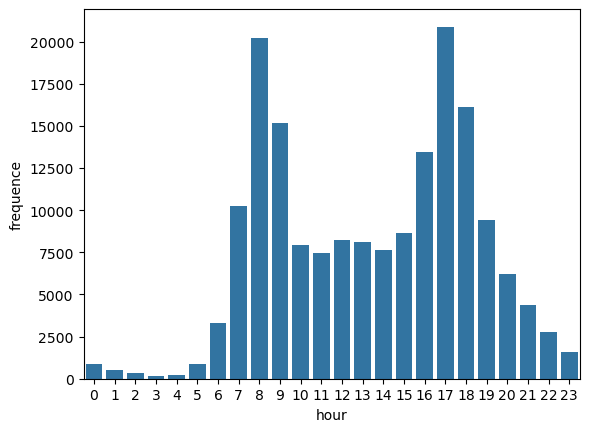

In [49]:
#Définition de la couleur 
color_master=sn.color_palette()[0]
#Calcul des 30 premiers vélos les plus sollicités
sn.countplot(data=df_master, x='start_time_hour',color=color_master)
plt.xlabel('hour')
plt.ylabel('frequence')

- **Observation:** Les heures de départ les plus significatives sont 17h et 7h après quoi vient 18h

- **Quel est la répartition des 10 stations de départ les plus sollicitées?**

Text(0, 0.5, 'frequence')

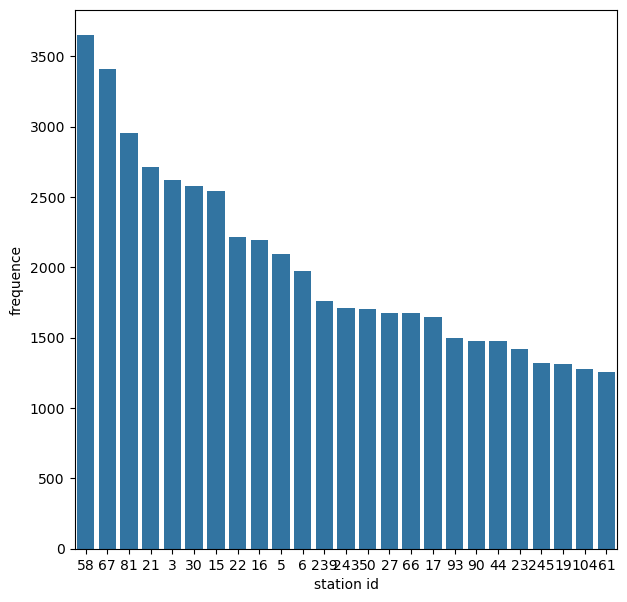

In [50]:
#Calcul des 25 premières stations les plus sollicitées
fig_dim=(7,7)#Création de la dimension de l'objet figure
fig,ax=plt.subplots(figsize=fig_dim)#Création d'un objet figure ayant comme paramettre ca dimension
color_master=sn.color_palette()[0]#Définition de la couleur uniforme
top25=df_master['start_station_id'].value_counts().head(25).index#Selection des 25 meilleurs stations et renvoie index
sn.countplot(data=df_master,x='start_station_id',color=color_master,order=top25)
plt.xlabel('station id')
plt.ylabel('frequence')

 **Observation:** La station la plus prisée pour les départ de course est la 58=Lake Merritt BART Station

**Quel est la répartition des 25 premiers différents types de vélos?**

Text(0, 0.5, 'frequence')

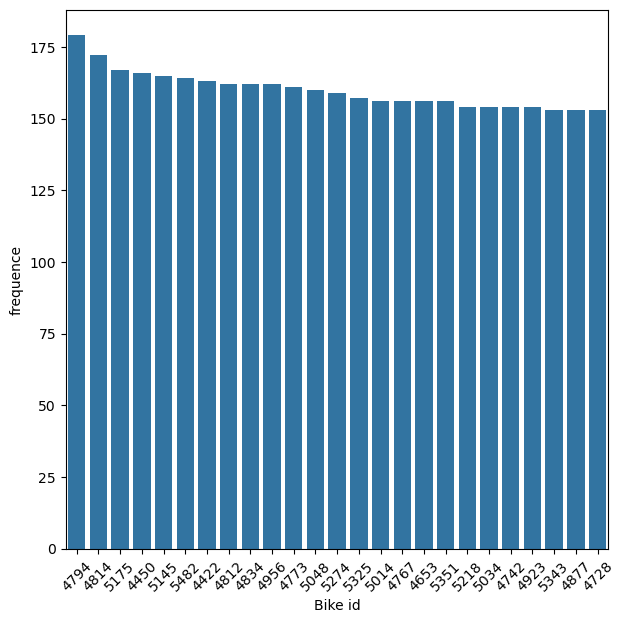

In [51]:
#Calcul des 25 premiers vélos les plus sollicitées
fig_dim=(7,7)#Création de la dimension de l'objet figure
fig,ax=plt.subplots(figsize=fig_dim)#Création d'un objet figure ayant comme paramettre ca dimension
color_master=sn.color_palette()[0]#Définition de la couleur uniforme
top25=df_master['bike_id'].value_counts().head(25).index#Selection des 25 meilleurs stations et renvoie index
sn.countplot(data=df_master,x='bike_id',color=color_master,order=top25)
plt.xticks(rotation=45)
plt.xlabel('Bike id')
plt.ylabel('frequence')

**Observation:** Les vélos sont sollicités ont pratiquement la meme distribution

### Variables nominales

- **Comment sont reparti les types de consommateurs?**

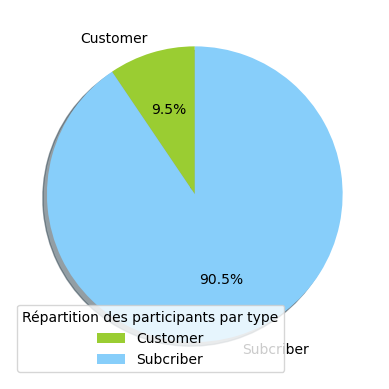

In [52]:
#Diagramme circulaire de la répartition des utilisateurs
labels=['Customer','Subcriber']
sizes=[16518,158173]
colors = ['yellowgreen', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(title='Répartition des participants par type')

**Observation:** Nous avons plus de souscripteurs que de consommateurs

- **Comment sont répartie les membres suivant leur genre member_gender?**

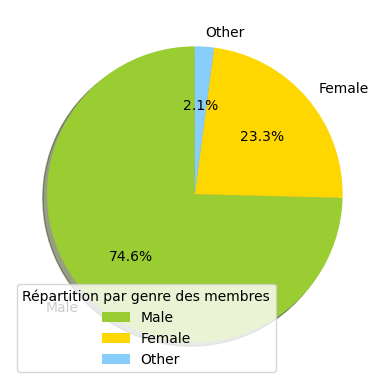

In [53]:
#Croissant de la répartition par sexe des participants
labels=['Male','Female','Other']
sizes=[130330,40719,3642]
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(title='Répartition par genre des membres')

In [54]:
df_master['member_gender'].value_counts()

Male      130330
Female     40719
Other       3642
Name: member_gender, dtype: int64

**Observation:** La tres grandes partie des participants aux courses sont des hommes

- **Comment sont répartie les courses par jours de la semaine?**

Text(0, 0.5, 'race')

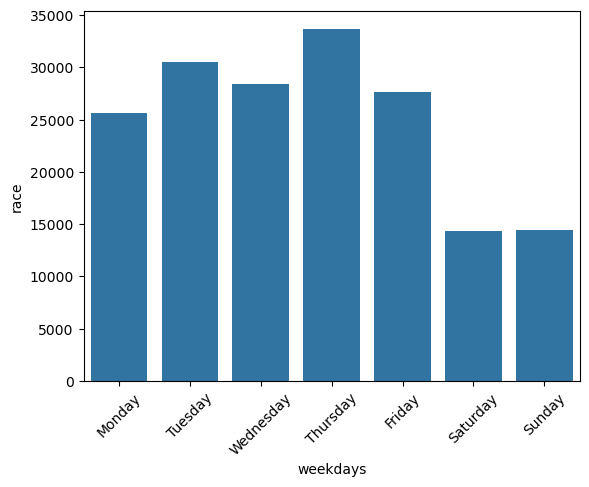

In [55]:
#Definition de la couleur de chaque éléments
color_master=sn.color_palette()[0]
#Définition de l'ordre des jours de la semaine
weekdays_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#Création du diagramme a barre avec la fonction countplot de seaborn
sn.countplot(data=df_master,x='start_time_weekday',color=color_master,order=weekdays_order)
plt.xticks(rotation=45)
plt.xlabel('weekdays')
plt.ylabel('race')

**Observation:** Les jours de départ des courses sont les Jeudi,les Mercredi et les vendredi

### Variables quantitatives

### Variables continues

- **Comment sont reparti les membres suivant leurs ages?**

Text(0, 0.5, 'frequence')

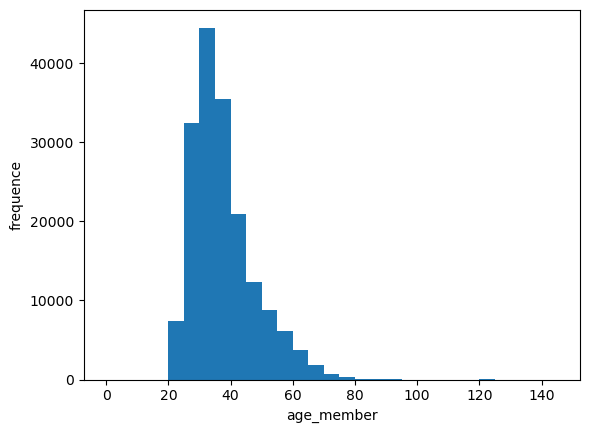

In [57]:
#Répartition des ages des membres
bins = np.arange(0, df_master['age_member'].max()+5, 5)
plt.hist(data =df_master, x = 'age_member', bins = bins)
plt.xlabel('age_member')
plt.ylabel('frequence')

**Observation:** La grande majorité des participants ont un age compris entre 20 et 70 ans.

- **Quel est la répartition de la durée des courses?**

Text(0, 0.5, 'frequence')

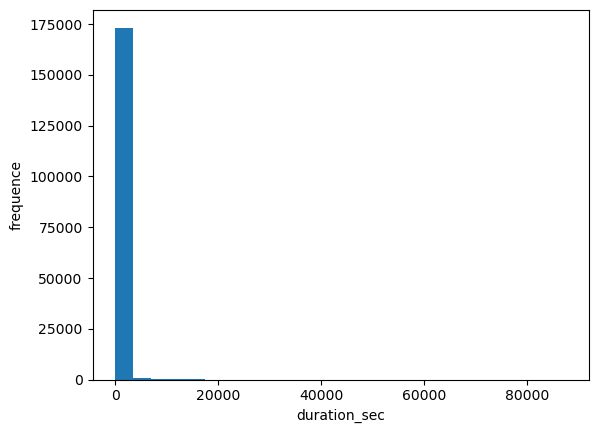

In [59]:
#Répartition de la durée des trajets
bins = np.arange(0, df_master['duration_sec'].max()+3500,3500)
plt.hist(data =df_master, x = 'duration_sec', bins = bins)
plt.xlabel('duration_sec')
plt.ylabel('frequence')

**Observation:** La durée du parcours est constante et est moins de 1000 secondes

- **Quel est la répartition de la distance des courses?**

Text(0, 0.5, 'frequence')

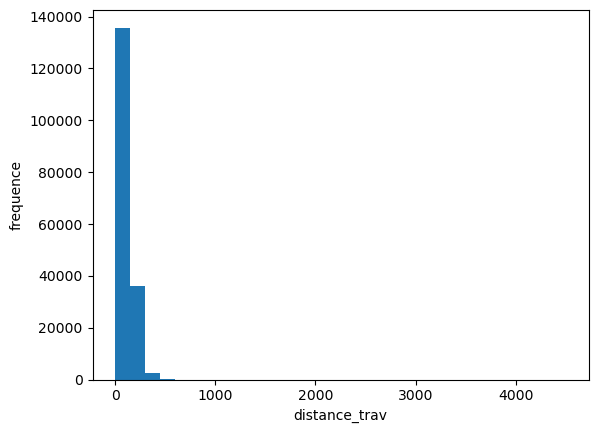

In [60]:
#Répartition de la longeur des distances parcourues
bins = np.arange(0, df_master['distance_trav'].max()+150,150)
plt.hist(data =df_master, x = 'distance_trav', bins = bins)
plt.xlabel('distance_trav')
plt.ylabel('frequence')


**Observation:** Les distances parcourues par les participants aux courses

**Discutez de la ou des distributions de vos variables d'intérêt. Y avait-il des points inhabituels ? Avez-vous eu besoin d'effectuer des transformations ?**

Nous ne constatons aucune variation inabituelle sur nos variables d'interets il convient neamoins de mentionner que pour le cas de l'etude des ages il serait convenable de n'etudier que la population ayant moins de 70 ans a cause de la tres faible proportion des participants des courses dont l'age est supérieur à 70 ans.

**Parmi les fonctionnalités que vous avez étudiées, y avait-il des distributions inhabituelles ? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données ? Si oui, pourquoi avez-vous fait cela ?**

Parmis les distribution étudiées nous avons pu remarquer que la distribution des parcours en secondes et la distributionde la distance parcourue ont quasiment similaires.Nous avons du fractionner la partie start_date en semaine puis en heure afin de pouvoir travailler.Nous avons aussi du calculer les distances parcouries en fonctions des informations données sur les altitudes et longitudes des points de départ et des points d'arrivées.

## Exploration bivariée

**Quel est la relation entre l'heure de départ et la distance parcourue?**

Text(0, 0.5, 'duration_sec')

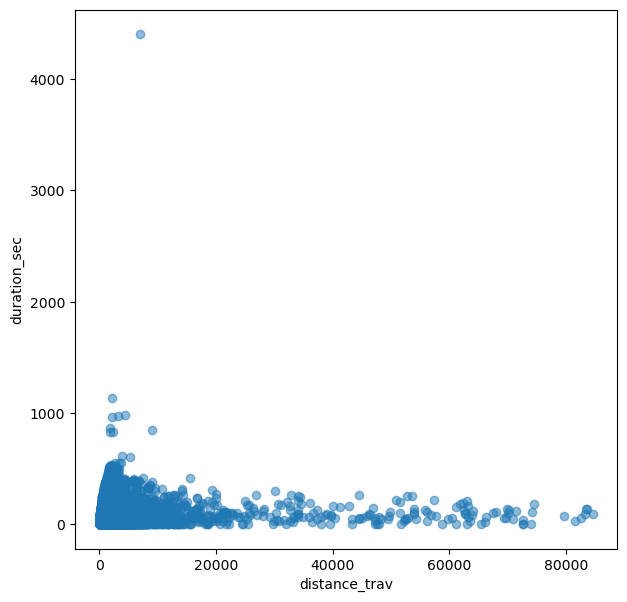

In [61]:
#Construction du nuage de points grace à la fonction regplot de seaborn
#Définir la dimenson de la figure à dessiner
plt.figure(figsize=[7,7])
plt.scatter(data=df_master,x='duration_sec',y='distance_trav',alpha=0.5)
plt.xlabel('distance_trav')
plt.ylabel('duration_sec')

**Observation:** La relation qui lie l'heure de départ et la distance parcourue est linéaire mis a par certaines valeurs abérrantes

**Quel est la relation entre la durée de parcour et l'age?**

Text(0, 0.5, 'Distance parcourue')

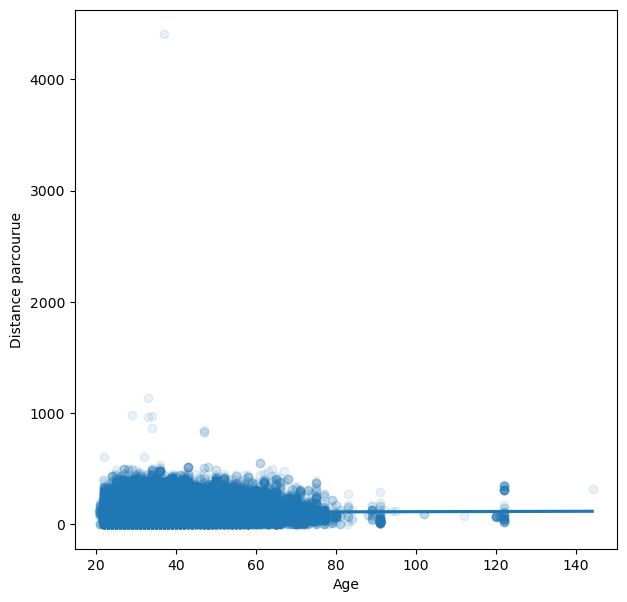

In [62]:
#Tracé d'un regplot avec seaborn
#Définition de la dimension de la figure
plt.figure(figsize=[7,7])
sn.regplot(data = df_master, x = 'age_member', y='distance_trav',truncate=True,x_jitter=0.1,scatter_kws={'alpha':1/10}) 
plt.xlabel('Age') 
plt.ylabel('Distance parcourue')

**Observation:** La relation qui lie l'age et la distance parcourue est constante

**Quels est la durée du parcours en fonction du sexe des membres?**

Text(0, 0.5, 'duration_sec')

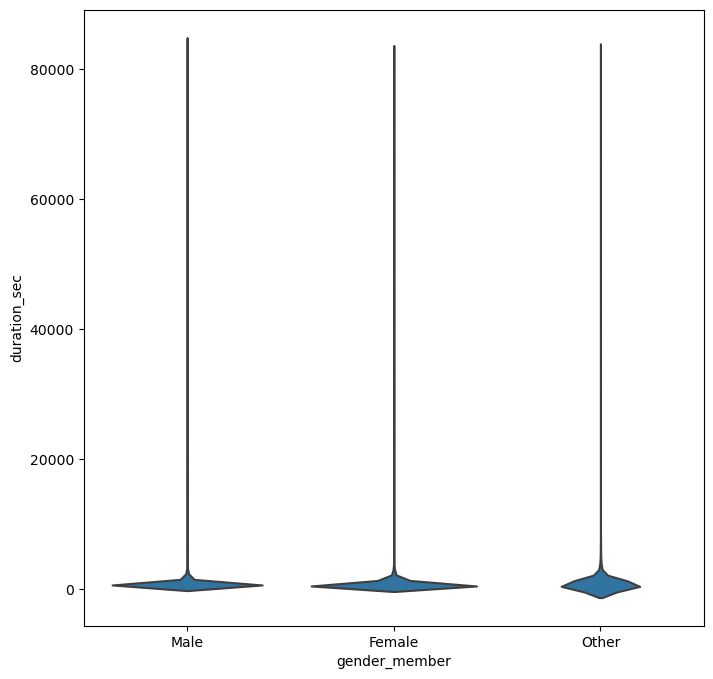

In [63]:
#Diagrame en violon de la durée du parcours en fonction du sexe des membres
#On definie les différentes catégories
gender_classes=['Male','Female','Other']
#On converti la liste gender_classes en categorie avec la fonction astype
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
#On converti la colonne member_gender en catégorie class
df_master['member_gender'] = df_master['member_gender'].astype(vclasses)
#On défini les dimensions de la figure
plt.figure(figsize=[8,8])
#On défini une couleur uniforme
base_color=sn.color_palette()[0]
#On utilise la fonction violon de seaborn pour tracer
sn.violinplot(data=df_master, x='member_gender', y='duration_sec',color=base_color,inner=None)
plt.xlabel('gender_member')
plt.ylabel('duration_sec')


**Observation:** On remarque que pour la distribution des autres genre est plus arrondie par contre celui des males et des femelles est similaire

**Quels est la distance parcourue en fonction du genre des membres?**

Text(0, 0.5, 'duration_sec')

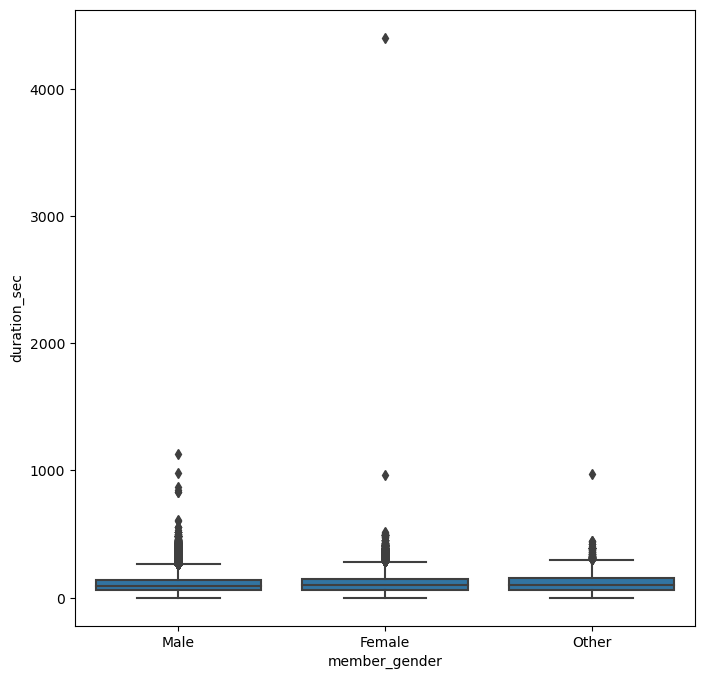

In [64]:
#Box plot de la distance parcourue en fonction du genre des membres
#On défini les dimensions de la figure
plt.figure(figsize=[8,8])
#On défini une couleur uniforme
base_color=sn.color_palette()[0]
#On utilise la fonction violon de seaborn pour tracer
sn.boxplot(data=df_master, x='member_gender', y='distance_trav', color=base_color)
plt.xlabel('member_gender')
plt.ylabel('duration_sec')

**Observation:** On remarque que pour les distributions sont les memes pour les trois genres et on remarques la présence des valeurs abérrantes plus marquées pour les hommes.Nous pourrions confirmer cette tendance avec le diagramme en facette suivant:

**Quel est la proportion des Males,femelles,et other en fonction du type de consommateurs?**

<AxesSubplot:xlabel='member_gender', ylabel='count'>

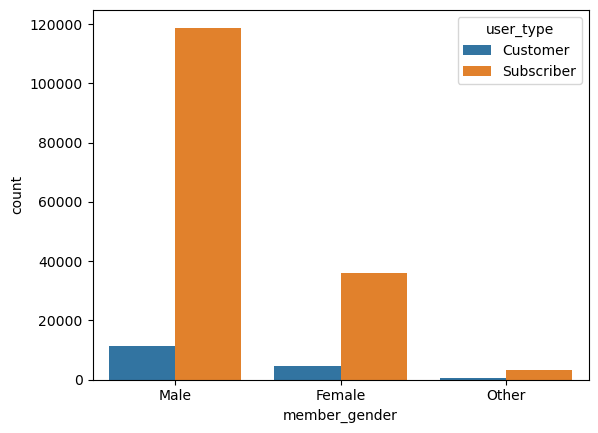

In [65]:
#Tracé du diagramme en barre en fonction du type de consommateur
#On va utiliser pour cela la fonction countplot de seaborn
sn.countplot(data =df_master, x = 'member_gender', hue = 'user_type') 

**Observation:** On remarque qu'il y'a moins de consommateur chez les hommes que les autres catégories mais ils ont plus de consommateur que les autres genres repertoriés.

**Quel est la répartition des ages en fonction des genres des membres?**

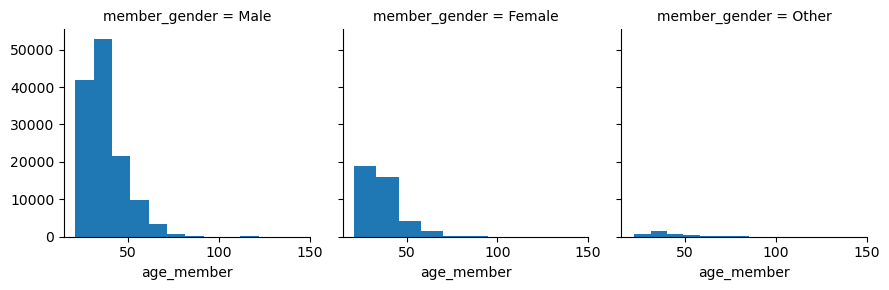

In [66]:
#Utilisation d'un graphique en facetage pour comparer les membres en fonction des heures
#Nous allons utiliser la fonction facetgrid pour le faire
g = sn.FacetGrid(data =df_master, col = 'member_gender') 
g.map(plt.hist, "age_member") 

**Observation:** L'histogramme montre que la répartition des hommes est beaucoup plus dense que celle des femmes et des autres genres.La tres grande majorité des genres à un age n'excédant pas 60 ans

**Quels est la répartion des genres en fonction des jours de course?**

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Thuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

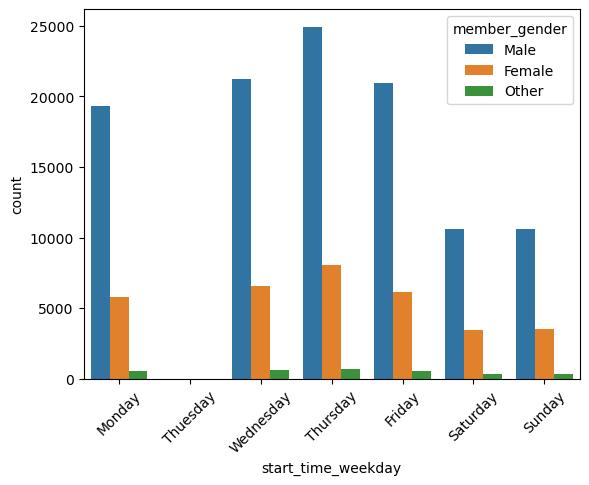

In [67]:
#Tracé du diagramme en barre des journeés de course et du genre
#On va utiliser pour cela la fonction countplot de seaborn
#On definie les différentes catégories
weekdays_classes=['Monday','Thuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#On converti la liste gender_classes en categorie avec la fonction astype
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=weekdays_classes)
#On converti la colonne member_gender en catégorie class
df_master['start_time_weekday'] = df_master['start_time_weekday'].astype(vclasses)
sn.countplot(data =df_master, x = 'start_time_weekday', hue = 'member_gender')
plt.xticks(rotation=45)

**Observation:** Le Jeudi est le jour ou toutes les categories confondues assistent le plus aux courses par contre tres peu sont présent les week_ends(Samedi,dimanche)

**Quel est la proportion en fonction du genre qui utilise les velos de partage?**

<AxesSubplot:xlabel='member_gender', ylabel='count'>

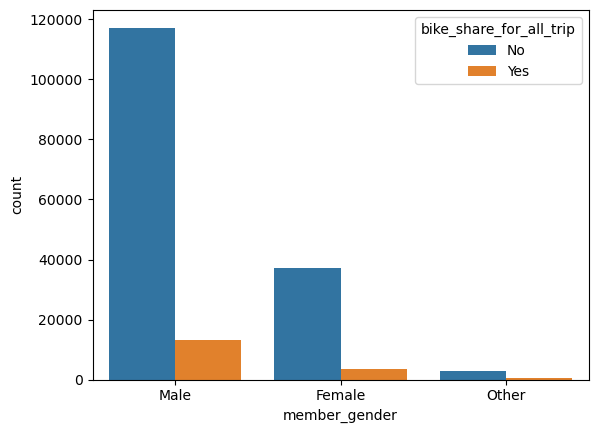

In [68]:
#Tracé du diagramme en barre en fonction de l'utilisation des vélos de partage
#On va utiliser pour cela la fonction countplot de seaborn
sn.countplot(data =df_master, x = 'member_gender', hue = 'bike_share_for_all_trip') 

**Observation:** On remarque que les hommes utilisent énormement les vélos de partage mais il convient toute fois d'etre prudent car cela peut etre du au fait que les hommes sont aussi les plus nombreux.

**Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Comment la ou les caractéristiques d'intérêt ont-elles varié avec d'autres caractéristiques de l'ensemble de données ?**

Nous remarquons les relations interessantes suivantes avec notre variable princiaple d'interet qui est le genre:

- Nous avons remarquer que toutes les genres confondues n'assistent pas vraiment les week-ends aux courses uniquement les jours de la semaine cela peut etre du au faiit qu'il n'y ai pas assez de communication la dessus le week_ends
- Les ages les plus représentés sont compris entre 18 et 50 ans tout age confondue

- La proportion des suscriber est nettement plus eleve que les consumers et ils le sont plus pour les males qui sont le plus représentés

- Le genre n'influence pas vraiment sur la durée et distance parcourue.

- Les heures et les durées ne dépendent pas des ages des participants

- Les hommes utilisent énormément les vélos de partage par rapport aux autres genres.


**Avez-vous observé des relations intéressantes entre les autres caractéristiques (pas la ou les principales caractéristiques d'intérêt) ?**
Deux relations m'ont parues tres interressante du point de vu marketing:

- La repartition des genres suivant les semaines de courses qui nous permettent de remarquer la tres faible participation des différents genres les week-ends ce qui pu supposer un manque de communication marketing ou une habitude de consommation pas vraiment connue.

- La relation entre le genre et l'age est aussi importante car elle permet de segmenter la clientele suivant les ages et ainsi mieux orienter nos actions marketing.

## Exploration multivariée

**Quel relation entre le genre,l'age et la durée de parcours?**

/home/dngan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


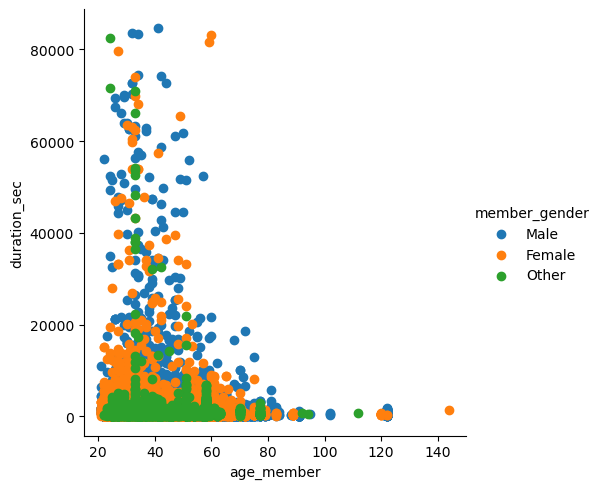

In [69]:
#Encodage par la couleur du genre,l'age et la durée du parcours
#Utilisation du facetage avec la fonction facetgrid de seaborn
g = sn.FacetGrid(data = df_master, hue = 'member_gender', size = 5)
g.map(plt.scatter,'age_member', 'duration_sec')
g.add_legend()

**Observation:** On remarque que quelque soit leur genre à age égal la durée du parcours est la meme dans les compétitions.

**Quel relation entre le genre,le type de client,la distance parcourue,et la durée de la course ?**

/home/dngan/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


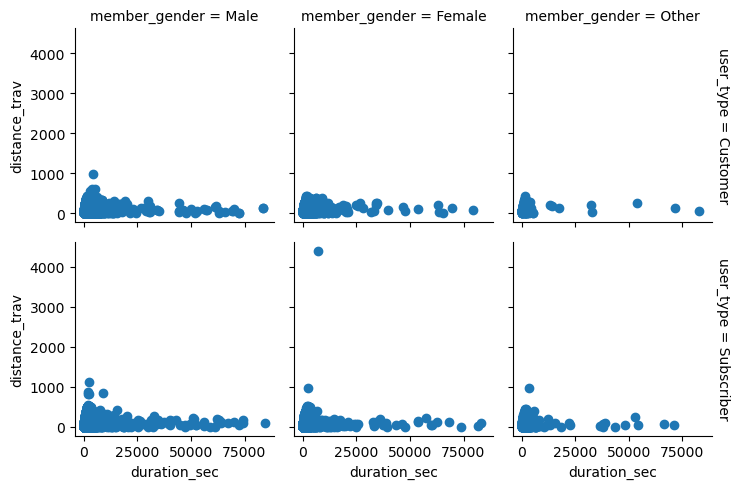

In [70]:
#Utilisation de la methode FacetGrid
#Utilisons la fonction pairgrid de seaborn
g = sn.FacetGrid(data = df_master, col = 'member_gender', row = 'user_type', size = 2.5,
margin_titles = True)
g.map(plt.scatter, 'duration_sec', 'distance_trav')

**Observation:** On remarque que la distance et la durée du parcours est une constance quelque soit le genre d'utilisateur ainsi que son type

**Quel relation entre le genre,les jours de la semaine et la durée de parcours?**

<AxesSubplot:xlabel='member_gender', ylabel='start_time_weekday'>

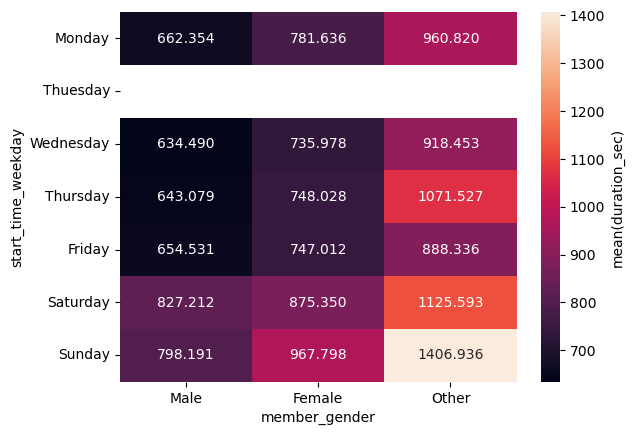

In [71]:
#Encodage par la couleur du genre,les jours de la semaine et la durée du parcours
#Utilisation de heatmap de seaborn
cat_means = df_master.groupby(['member_gender','start_time_weekday']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'start_time_weekday', columns = 'member_gender',
values = 'duration_sec_avg')
sn.heatmap(cat_means, annot = True, fmt = '.3f',
cbar_kws = {'label' : 'mean(duration_sec)'})

**Observation:** On remarque qu'en considérant la durée des courses par semaine en moyenne les autres genres durent beaucoup plus longtemps que les hommes et les femmes.

**Parlez de certaines des relations que vous avez observées dans cette partie de l'enquête. Y a-t-il eu des fonctionnalités qui se sont renforcées en termes d'examen de vos fonctionnalités d'intérêt ?**

Dans cette partie nous nous sommes attardé sur les relations suivantes:

- Le genre,l'age et la durée de parcours et il nous a été donné de remarquer que la durée du parcours ne dépends pas du genre ou de l'age des participants car les les distributions ce superposent entre elles.Mais néanmoins les hommes se distinguent quelque peu et cela est assez logique si nous regardons cela dans le prisme des performances athlétiques.

- La distance et la durée du parcours ne dependent pas vraiment du genre car ils evoluent de facon linéaire

**Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctionnalités ?**

- Au regards des informations que nous avons recu au début de notre etude l'exploration multivariée nous a permis plutot de consolider nos acquis de départ.
- l'analyse multivariée nous a permis de remarquer que les autres genres sont beaucoup plus actives le week-ends que les hommes et les femmes remarque que l'analyse bivariée ne nous avait pas permis de faire.

## Conclusion

En définitive notre travail a permis de mettre en exergue dans ce jeu de données les conclusions suivantes:

- Les hommes participent le plus aux courses que les autres genres(femmes,autres)

- Les week-ends(samedi,dimanche) sont les journées ou les trois genres participent le moins aux courses et le jeudi est la journée ou le taux de participation est la plus elevé.

- Les autres genres mettent plus de temps dans les courses le week_end que les autres sexes

- Quelque soit le genre l'age minimum de participation a la course est de 18 ans et maximum 60 ans

- Les hommes sollicitent le plus les vélos de partagés

